In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import seaborn as sns

from utils import fetch_ds

from peaks_over_threshold import SPOT, DSPOT

sns.set_theme()

/home/beekill/projects/peaks-over-threshold/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Air Quality

In [2]:
air_quality = fetch_ds(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


<Axes: xlabel='None', ylabel='PT08.S3(NOx)'>

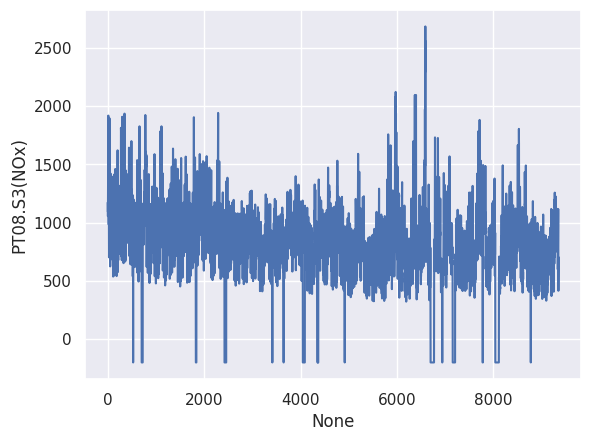

In [3]:
sns.lineplot(X, x=X.index, y="PT08.S3(NOx)")

In [4]:
spot = SPOT(1e-4)
thresholds, alerts = spot.fit_predict(X["PT08.S3(NOx)"].to_numpy(), num_inits=1000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8357/8357 [00:00<00:00, 77230.93it/s]


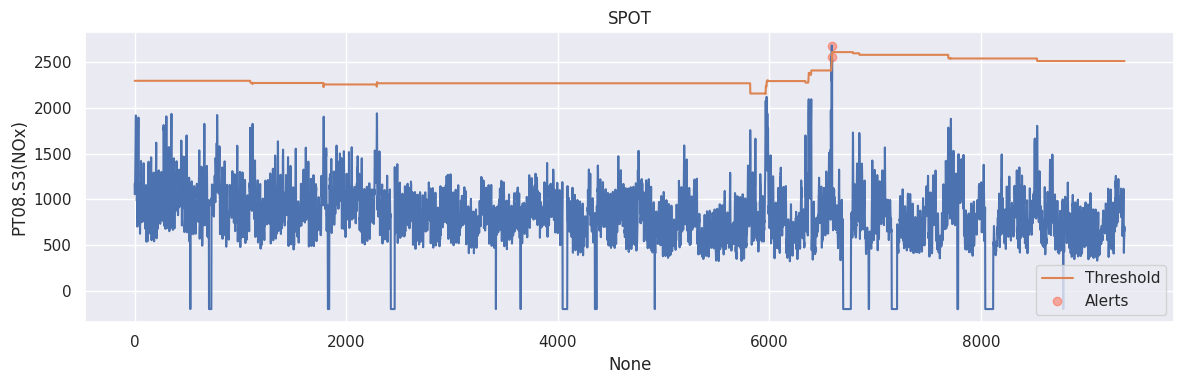

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(X, x=X.index, y="PT08.S3(NOx)")
ax.plot(X.index, thresholds, label="Threshold")
ax.scatter(
    X.index[alerts],
    X["PT08.S3(NOx)"].loc[alerts],
    color="tomato",
    alpha=0.5,
    label="Alerts",
)
ax.legend()
ax.set_title("SPOT")
fig.tight_layout()

In [6]:
spot = DSPOT(100, 1e-4)
thresholds, alerts = spot.fit_predict(X["PT08.S3(NOx)"].to_numpy(), num_inits=1000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8257/8257 [00:00<00:00, 19952.10it/s]


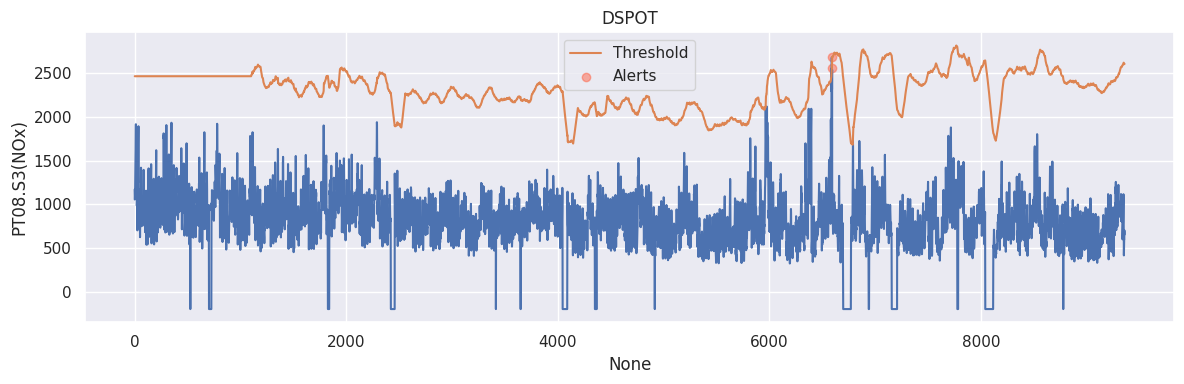

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(X, x=X.index, y="PT08.S3(NOx)")
ax.plot(X.index, thresholds, label="Threshold")
ax.scatter(
    X.index[alerts],
    X["PT08.S3(NOx)"].loc[alerts],
    color="tomato",
    alpha=0.5,
    label="Alerts",
)
ax.legend()
ax.set_title("DSPOT")
fig.tight_layout()